In [249]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [250]:
import math
import numpy as np

In [481]:
gravity = 32.2  # ft/s^2
initial_position = math.pi/4
initial_velocity = 0
arm_length = 2 # feet
end_time = 0.5  # seconds
time_step = 0.05  # seconds
time_range = np.arange(0,end_time + time_step,time_step)

\begin{equation*}
general\ solution\\\theta(t) = A\sin(\lambda t) + B\cos(\lambda t)
\end{equation*}

In [449]:
def pendulum_analytical_angle_sol(velocity_naut, theta_naut, length, end_time):
    lambd = math.sqrt(gravity/length)
    A = velocity_naut / lambd
    B = theta_naut
    angle_in_time = []
    for time in time_range:
        angle_in_time.append((A * math.sin(lambd * time)) + (B * math.cos(lambd * time)))
    return angle_in_time

In [450]:
analytical_solution_output = pendulum_analytical_angle_sol(initial_velocity,initial_position,arm_length,end_time)

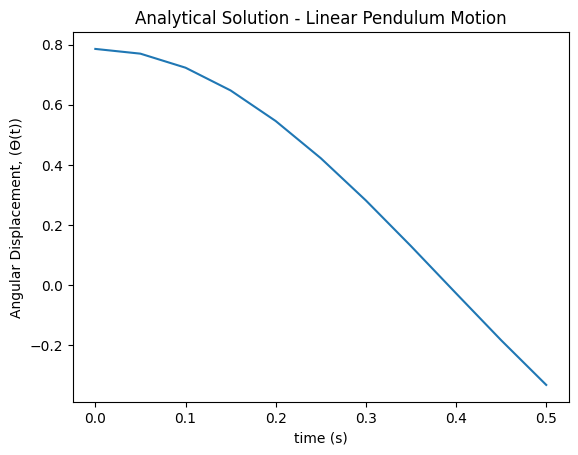

In [451]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Analytical Solution - Linear Pendulum Motion')
plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output)

\begin{equation*}
v_{i+1} = v_i - \Delta t \lambda^2 \theta_i \\
\theta_{i+1} = \theta_i + \Delta t v_i
\end{equation*}

In [468]:
def pendulum_numerical_angle_sol_foward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(len(time_range) - 1):
        velocity_series.append(velocity_series[i] - (time_step * lambd**2 * angle_series[i]))
        angle_series.append(angle_series[i] + (time_step * velocity_series[i]))
        
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - \Delta t \lambda^2 \theta_{i-1} \\
\theta_{i+1} = \theta_{i-1} + \Delta t v_i
\end{equation*}

In [461]:
def pendulum_numerical_angle_sol_backward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (time_step * lambd**2 * angle_series[i-1]))
        angle_series.append(angle_series[i-1] + (time_step * velocity_series[i]))
        
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - 2 \Delta t \lambda^2 \theta_{i-1} \\
\theta_{i+1} = \frac{\theta_{i-1} + \Delta t v_{i-1} + v_i}{2}
\end{equation*}

In [483]:
def pendulum_numerical_angle_sol_central_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (2 * time_step * lambd**2 * angle_series[i-1]))
        angle_series.append((angle_series[i-1] + (time_step * (velocity_series[i-1] + velocity_series[i])) / 2))
        
    return angle_series

In [469]:
numerical_solution_output_forward_difference = pendulum_numerical_angle_sol_foward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [464]:
numerical_solution_output_backward_difference = pendulum_numerical_angle_sol_backward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [465]:
numerical_solution_output_central_difference = pendulum_numerical_angle_sol_central_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

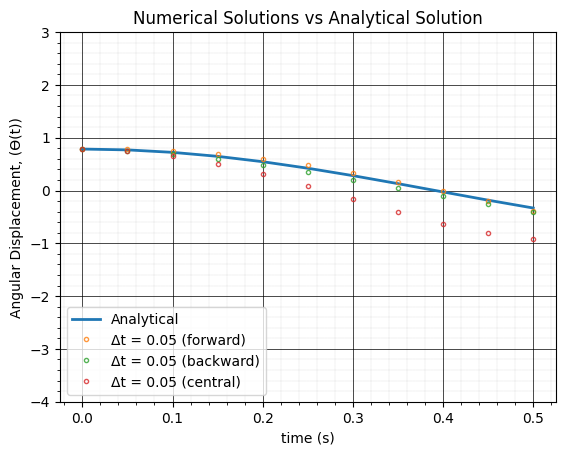

In [470]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Numerical Solutions vs Analytical Solution')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.minorticks_on()
plt.ylim([-4, 3])

plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output, label='Analytical', linewidth=2)
plt.plot(plot_time,numerical_solution_output_forward_difference,"o" , label=f'Δt = {time_step} (forward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_backward_difference,"o" , label=f'Δt = {time_step} (backward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_central_difference,"o" , label=f'Δt = {time_step} (central)', markersize=3, alpha = 0.8, mfc='none')

plt.legend(loc="lower left")

In [491]:
forward_error_plot = []
def calculate_error_forward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        forward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [492]:
backward_error_plot = []
def calculate_error_backward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        backward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [493]:
central_error_plot = []
def calculate_error_central(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        central_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [494]:
calculate_error_forward(numerical_solution_output_forward_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.05 = 0.01575
error at time 0.10 = 0.03077
error at time 0.15 = 0.04318
error at time 0.20 = 0.05121
error at time 0.25 = 0.05335
error at time 0.30 = 0.04840
error at time 0.35 = 0.03561
error at time 0.40 = 0.01474
error at time 0.45 = 0.01387
error at time 0.50 = 0.04932


In [495]:
calculate_error_backward(numerical_solution_output_backward_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.05 = 0.01586
error at time 0.10 = 0.03118
error at time 0.15 = 0.04535
error at time 0.20 = 0.05778
error at time 0.25 = 0.06796
error at time 0.30 = 0.07545
error at time 0.35 = 0.07995
error at time 0.40 = 0.08125
error at time 0.45 = 0.07928
error at time 0.50 = 0.07409


In [496]:
calculate_error_central(numerical_solution_output_central_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.05 = 0.01586
error at time 0.10 = 0.06280
error at time 0.15 = 0.13764
error at time 0.20 = 0.23361
error at time 0.25 = 0.34077
error at time 0.30 = 0.44683
error at time 0.35 = 0.53822
error at time 0.40 = 0.60133
error at time 0.45 = 0.62381
error at time 0.50 = 0.59587


In [497]:
time_index = []

for i in range(len(time_range)):
    time_index.append(i*time_step)

In [498]:
print(time_index)

[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5]


(0.0, 0.5)

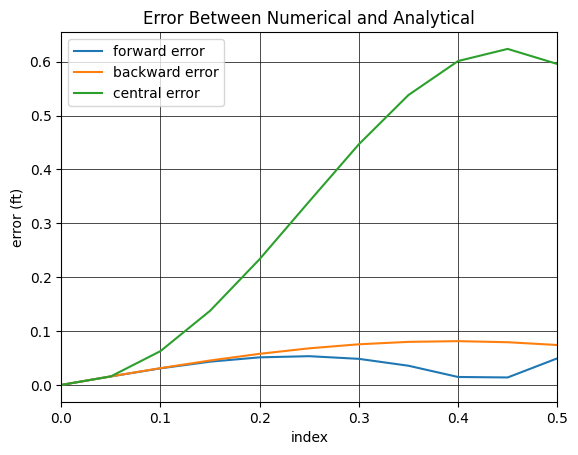

In [499]:
# plot errors
plt.plot(time_index, forward_error_plot,"-" , label='forward error', markersize=3)
plt.plot(time_index,backward_error_plot,"-" , label='backward error', markersize=3)
plt.plot(time_index,central_error_plot,"-" , label='central error', markersize=3)
plt.xlabel('index')
plt.ylabel('error (ft)')
plt.title('Error Between Numerical and Analytical')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.legend(loc="upper left")
plt.xlim([0, end_time])